# GeoCoding and Classification of an AirBnB Dataset Using 
# Machine Learning

### Notebook by [Fredrik Davanger Wilberg]

# Table of contents

1. [Introduction](#Introduction)

2. [Required libraries and datasets](#Required-Libraries-and-Datasets)

3. [Presentation of the Dataset and The Problem](#Presentation-of-the-Dataset-and-the-Problem)

4. [Step 1: Checking the Data | Multiclass Classification](#Step-1:-Checking-the-Data-|-Multiclass-Classification)

5. [Step 2: Classifying the regions in Bristol](#Step-2:-Classifying-the-regions-in-Bristol)

6. [Step 3: Kmeans | Unsupervised Machine Learning](#Step-3:-Kmeans-|-Unsupervised-Machine-Learning)

7. [Step 4: Kneighbours | Supervised Machine Learning](#Step-4:-Kneighbours-|-Supervised-Machine-Learning)

8. [Step 5: Modifying the Classification](#Step-5:-Modifying-the-Classification)

9. [Step 1: Checking the data | Multiclass Binary Classification](#Step-1:-Checking-the-data-|-Multiclass-Binary-Classification)

10. [Step 2: Classifying the Landlords](#Step-2:-Classifying-the-Landlords)

11. [Step 3: TensorFlow](#Step-3:-TensorFlow)

12. [Conclusion](#Conclusion)

13. [References](#References)






# Introduction

[[ go back to the top ]](#Table-of-contents)

AirBnB inc. is a global market place for hospitality service that has given people an accessible alternative to company residential accommondations. Since the establishment in 2008, AirBnB has been collecting data from their services in order to gain knowledge about how customers respond to lodging in a privately-owned building.

The given dataset contains findings from AirBnB reviews from Bristol, United Kingdom. 

**In this report, Machine Learning will be used to classify and predict behavior of people that uses AirBnBs services in Bristol.**



# Required Libraries and Datasets

[[ go back to the top ]](#Table-of-contents)


This notebook is written in Python 3.6.5. using multiple libraries, as listed below:


* **NumPy**: Multidimensional arrays
* **pandas**: DataFrame structure
* **scikit-learn**: Machine Learning package
* **matplotlib**: Plotting library
* **TesnsorFlow**: Library for fast computing by Google 
* **IPython**: Command Shell
* **Warnings**: Python warning controller
* **Iris Data set**: A dataset containing Fisher's Iris Dataset (used for quality control)
* **Re**: Regular Expressions
* **Time**: Stopwatch


The main dataset will be stored in a variable called "airbnb". However, the variable will be added a digit at the end when big changes are made to it. 

# Presentation of the Dataset and the Problem 

[[ go back to the top ]](#Table-of-contents)


The dataset "Bristol AirBnB Data", as illustrated below, consists of 2375 data points and got 28 different variables from customers visiting Bristol. Roughly, the finding represent tenant satisfaction and statistical attribute about the accommonations.    




In [4]:
import pandas as pd
airbnb = pd.read_csv('../input/BristolAirbnbListings.csv')
airbnb.shape


(2375, 28)

In [6]:
airbnb.iloc[0:3,0:13]

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4,51.439942,-2.591726,Townhouse,Private room,2,1,1
1,117122,City Centre - Waterside Retreat,591555,Marcus,Clifton,BS8 4UJ,51.450512,-2.610536,Apartment,Private room,4,2,1
2,146407,Sunny Central Artist Cottage (Dbl),708175,Orla,Southville,BS3,51.441308,-2.602706,Townhouse,Private room,3,1,1


In [7]:
airbnb.iloc[0:3,13:22]

,beds,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness
0,1,27,4,130,2018-09-28,2.10,96,10,9
1,2,65,1,126,2018-10-28,1.40,99,10,10
2,2,38,2,57,2018-09-12,0.76,91,9,8


In [8]:
airbnb.iloc[0:3,22:28]

,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
0,10,10.0,10.0,10.0,5,44
1,10,10.0,10.0,10.0,1,360
2,9,10.0,9.0,9.0,2,46


The snippet dataset above shows that there are multiple possibilities for machine learning, regression and classification. For this report, the focus will be on geographical classification and binary mutilabel classification. The questions that will be addressed are as follow:

* **Is it possible to classify the neighbourhoods based on latitude and longitude?**
* **Can we use machine learning to classify between professional and amateur listers?**

For the classification of the neighbourhoods, the accuracy most be at least 80% for it to be considered somewhat acceptable. Values below this will result in the question to be labeled as not doable to do given the algorithms and variables. On the other hand, in the feud between the amateur and professional listers, an unintelligent machine will on average guess 50% right. For this reason, everything below 70% will be considered as a unsatisfied result. A professional lister will be defined as a landlord that has more than one listing.

The "No Free Lunch Theorem" says that there is no superior algorithm in Machine Learning that will outperform the rest every time. For this reason, multiple algorithms will be used. (Wolpert, 1997)

I order to use this dataset for analysis, it is important to check it for mistakes, missing values, errors and modifications. Given this is a modified dataset, one might be temped to go deeper into the dataset than usual.

## Step 1: Checking the Data | Multiclass Classification

[[ go back to the top ]](#Table-of-contents)

There are multiple approaches to check whether a dataset is suitable for analysis. However, the first approach should be to drop columns that are not needed. The columns; 'id', 'name', 'host_id', 'postcode', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'availability_365' will be dropped completely since they will not be needed in any of the analysis. 

In [13]:
airbnb = airbnb.drop(['id', 'name', 'host_name', 'host_id', 'postcode', 'minimum_nights', 'number_of_reviews'
                      , 'last_review', 'reviews_per_month', 'availability_365'], axis =1)

KeyError: "['id' 'name' 'host_name' 'host_id' 'postcode' 'minimum_nights'\n 'number_of_reviews' 'last_review' 'reviews_per_month' 'availability_365'] not found in axis"

In [15]:
airbnb.iloc[0:3,0:12]

,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy
0,Windmill Hill,51.439942,-2.591726,Townhouse,Private room,2,1,1,1,27,96,10
1,Clifton,51.450512,-2.610536,Apartment,Private room,4,2,1,2,65,99,10
2,Southville,51.441308,-2.602706,Townhouse,Private room,3,1,1,2,38,91,9


In [16]:
airbnb.iloc[0:3,12:18]

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,9,10,10.0,10.0,10.0,5
1,10,10,10.0,10.0,10.0,1
2,8,9,10.0,9.0,9.0,2


Furthermore, the report consists of two problems that uses different data. In order to keep at much data as possible, the data should be cleansed only in the columns that are appropriate for each problem. Any total statistical description or visualization is seen as unnecessary due to the fact that dataset consist of different types variables with different purpose. Visualization will be presented when the associated variables are combined.

To a make model that are able to classify the different neighbourhoods (regions), the variables 'neighbourhood', 'latitude' and 'longitude' will be used. Neighbourhood will be the depended variable that is being predicted by the other two variables. 

In [17]:
airbnb_region = airbnb[['neighbourhood','latitude','longitude']]
airbnb_region.head()

,neighbourhood,latitude,longitude
0,Windmill Hill,51.439942,-2.591726
1,Clifton,51.450512,-2.610536
2,Southville,51.441308,-2.602706
3,Bedminster,51.441006,-2.601208
4,Bedminster,51.438517,-2.601421


From the dataset above, the desired variables are selected. However, the dataset must be check first. 
The approach to make the dataset ready for analyzation is to check for missing values, then errors.

In [18]:
airbnb_region.isnull().sum()

neighbourhood    0
latitude         0
longitude        0
dtype: int64

The describption above shows that there are no missing values.

In [19]:
airbnb_region.dtypes

neighbourhood     object
latitude         float64
longitude        float64
dtype: object

From the table above, the variables are in desired datatype. To check the columns for mistakes, there are several approaches that can be made. The first column consists of object, which usually are not so many of and therefore a outline of the unique variables could help.

In [20]:
print(airbnb_region['neighbourhood'].unique())
print(len(airbnb_region['neighbourhood'].unique()))

['Windmill Hill' 'Clifton' 'Southville' 'Bedminster' 'Easton' 'Ashley'
 'Redland' 'Brislington West' 'Brislington East' 'Lawrence Hill' 'Central'
 'Eastville' 'Hotwells & Harbourside' 'St George West' 'St George Central'
 'Stoke Bishop' 'Bishopsworth' 'Henbury & Brentry' 'Lockleaze' 'Cotham'
 'Southmead' 'Westbury-on-Trym & Henleaze' 'Clifton Down' 'Stockwood'
 'Bishopston & Ashley Down' 'Frome Vale' 'Avonmouth & Lawrence Weston'
 'Knowle' 'Horfield' 'Hillfields' 'St George Troopers Hill' 'Filwood'
 'Hengrove & Whitchurch Park' 'Hartcliffe & Withywood']
34


All the neighbourhoods above are neighbourhoods in Bristol. Even though, according to the government of Bristol, Westbuty on Trym and Henleaze are two different neighbourhoods, we will treat them as one. To check whether there are any mistakes or errors in the variable latitude or longitude, we can make a for look check if we coordinated are as predicted. (Britol.gov.uk, 2019)

In [21]:
print(airbnb_region['latitude'].max())
print(airbnb_region['latitude'].min())
print(airbnb_region['longitude'].max())
print(airbnb_region['longitude'].min())

51.51255450359999
51.404298635699995
-2.5146350022
-2.7014181506


The output above shows that all the coordinates are within reason. A for loop can provide the same qualification.

In [22]:
ii = 0
jj = 0
for i in airbnb["latitude"]:
    if i > 52 or i < 51:
        print (i)
        ii = +1

for j in airbnb["longitude"]:
    j = j*-1
    if j > 3 or j < 2: 
        print (j)
        jj = +1

if (ii + jj) == 0:
    print('All latitude values between 53 and 52,', 'and', 'all longitude values between -3 and -2')
    

All latitude values between 53 and 52, and all longitude values between -3 and -2


From the output above, we assume that all the coordinates are correct and there are no errors.

## Step 2: Classifying the regions in Bristol

[[ go back to the top ]](#Table-of-contents)

The dataset is cleansed and it can be used for data analysis. Before we look at the data, we can have a look at the real map of Bristol to get a view over how the city is structured.



In [23]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.bristolnhwnetwork.org.uk/uploads/1/2/6/4/12643669/6710274_orig.png")

To illustrated how the given data are distributed, it can be plotted in a scatter diagram. The X-axis will represent longitude and the y-axis latitude. 

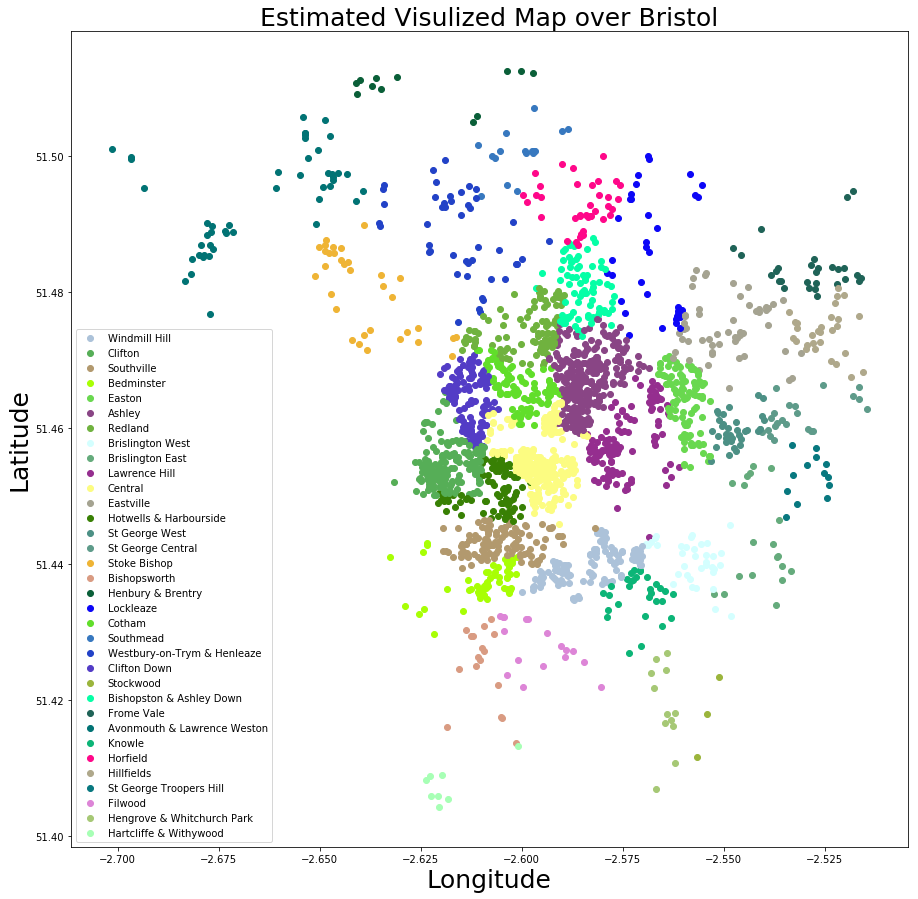

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
plt.rcParams["figure.figsize"] = (15,15)
airbnb_neighbourhood = airbnb['neighbourhood'].tolist()

labels_values = []
for k in range(1,35):
    labels_values.append(k)

neighbourhood_label = []
labels = airbnb['neighbourhood'].unique()
labels = airbnb['neighbourhood'].unique().tolist()
airbnb_neighbourhood = airbnb['neighbourhood'].tolist()

airbnb_labels = []
region=[]

for i in range(len(airbnb_neighbourhood)):
    region = airbnb_neighbourhood[i]
    for j in range(len(labels)):
        if labels[j] == region:
            airbnb_labels.append(labels_values[j])

xx = airbnb['latitude']
yy = airbnb['longitude']  

scatter_x = np.array(xx)
scatter_y = np.array(yy)
group = np.array(airbnb_labels)

color_dict = dict(zip(labels_values, colors_list[0:34])) 

label_list= airbnb['neighbourhood'].unique().tolist()

for g in range(len(airbnb['latitude'])):
    q = airbnb_labels[g]
    plt.scatter(scatter_y[g], scatter_x[g], c = color_dict[q], facecolor = 'grey', label = airbnb_neighbourhood[g] 
                if airbnb_neighbourhood[g] in label_list else "" ) 

    if airbnb_neighbourhood[g] in label_list:
        label_list.remove(airbnb_neighbourhood[g])
    
plt.legend()

plt.xlabel('Longitude', fontsize=25)
plt.ylabel('Latitude', fontsize=25)
plt.title('Estimated Visulized Map over Bristol', fontsize=25)
plt.show()

The scatter plot above shows that the data is fairly distributed. Although, the center of city got more plots than the outer city.  

## Step 3: Kmeans | Unsupervised Machine Learning

[[ go back to the top ]](#Table-of-contents)

The first method that are going to be used is unsupervised Kmeans clustering. Kmeans clustering tries to partition the observation(n) into desired clusters (k). For the Kmeans cluster, all the different neighborhoods will be given a different label from 1 to 34 



In [25]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
labels_values = []
for k in range(1,35):
    labels_values.append(k)


neighbourhood_label = []
labels = airbnb['neighbourhood'].unique()
labels = airbnb['neighbourhood'].unique().tolist()
airbnb_neighbourhood = airbnb['neighbourhood'].tolist()

airbnb_labels = []
region=[]

for i in range(len(airbnb_neighbourhood)):
    region = airbnb_neighbourhood[i]
    for j in range(len(labels)):
        if labels[j] == region:
            airbnb_labels.append(labels_values[j])

airbnb_kmeans = airbnb_region
airbnb_kmeans['labels'] = airbnb_labels
airbnb_kmeans = airbnb_kmeans.drop(['neighbourhood'], axis = 1)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
airbnb_kmeans.head(10)

,latitude,longitude,labels
0,51.439942,-2.591726,1
1,51.450512,-2.610536,2
2,51.441308,-2.602706,3
3,51.441006,-2.601208,4
4,51.438517,-2.601421,4
5,51.466409,-2.555332,5
6,51.466684,-2.582741,6
7,51.466615,-2.587090,6
8,51.479260,-2.591081,7
9,51.479706,-2.591490,7


The neighbourhoods are now labeled from 1 to 34 and we can see if there is possible to cluster the labels based on longitude and latitude using K-means clustering. Naturally, the number of clusters will be equal the number of different neighbourhoods.

In [27]:
X = airbnb_kmeans[['latitude','longitude']]
y = airbnb_kmeans['labels']
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42)
clf = KMeans(n_clusters = 34, random_state = 42, n_init=10)
clf.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=34, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

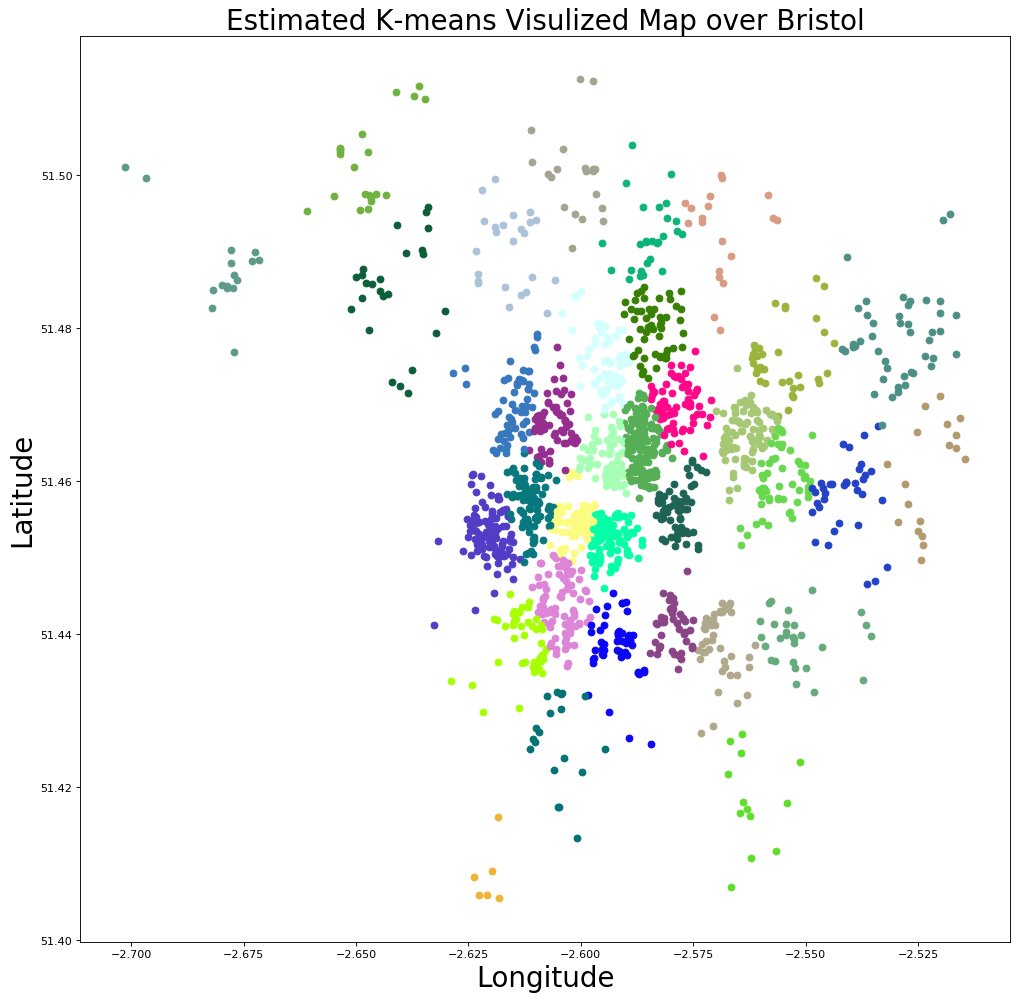

In [28]:
import matplotlib.colors as colors
longitude_latitude = X_train[['latitude', 'longitude']]
l_l_array = longitude_latitude.values
colors_list = list(colors._colors_full_map.values())
clf = KMeans(n_clusters=34, random_state = 42)
clf.fit(X_train, y_train)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = colors_list[0:34]

plt.figure(figsize=(15,15), dpi=80)
for i in range (len(l_l_array-1)):
    plt.scatter(l_l_array[i][1], l_l_array[i][0], c = colors[labels[i]] )
    
plt.xlabel('Longitude', fontsize=25)
plt.ylabel('Latitude', fontsize=25)
plt.title('Estimated K-means Visulized Map over Bristol', fontsize=25)    
    
plt.show()

The cluster above shows that algorithm was able to cluster the dataset into different groups. To estimate how well the unsupervised model was to cluster the neighbourhoods, we can have a look at the silhouette score. The silhouette score ranges from -1 to 1 where a high value indicates that well matched clusters. 

In [29]:
print("Training set:", clf.score(X_train,y_train))
print("Test set:    ", clf.score(X_test,y_test))

Training set: -0.04824433684507312
Test set:     -0.018755886577309866


The cluster returns negative values both for the training set and test set. It is therefore not optimal to use unsupervised K-means clustering to cluster the data based on our inputs. The reason for this is that the model does not have any information about the neighbourhood borders in Bristol. It will cluster based on the groups average, and cluster observations with the nearest mean. 

Alternatively, supervised learning can be used to tackle this problem. 

## Step 4: Kneighbours | Supervised Machine Learning

[[ go back to the top ]](#Table-of-contents)

Supervised learning uses labeled data to classify observations. From the supervised algorithm available, K-nearest neighbours(KNN) will be choses. KNN is a type of instance-based learning which the objects being classified plurality vote of its neighbours and then assign to the group class most common among its nearest neighbours. The number of neighbours can be assigned, and the following code will check the percentage score for 1 to 20 neighbours.

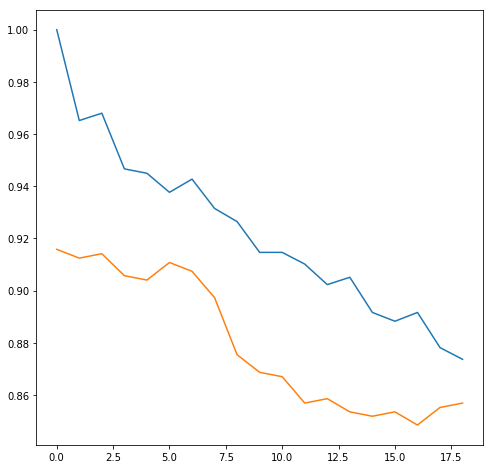

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_train = []
knn_test = []
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_train.append(knn.score(X_train,y_train))
    knn_test.append(knn.score(X_test,y_test))

knn_train_df = pd.DataFrame(knn_train)
knn_test_df = pd.DataFrame(knn_test)
plt.figure(figsize=(8,8))
plt.plot(knn_train_df)
plt.plot(knn_test_df)
plt.show()

The graph above illustrates that increasing k-neighbours leads to more mistakes. This suggest that if we base our classification on the closest neighbour we will have the biggest chance of classifying correctly.   

In [32]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9158249158249159

The accuracy above shows that there are over 91 % chance of correct classification.

In [33]:
from sklearn import metrics
y_expect = y_test
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        30
           2       0.93      0.95      0.94        40
           3       0.84      1.00      0.91        31
           4       0.93      0.76      0.84        17
           5       0.89      1.00      0.94        17
           6       0.97      0.91      0.94        80
           7       0.91      0.68      0.78        31
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       0.97      0.97      0.97        31
          11       0.91      0.96      0.94        77
          12       1.00      0.94      0.97        16
          13       0.95      0.75      0.84        24
          14       0.83      1.00      0.91         5
          15       1.00      0.83      0.91         6
          16       0.89      1.00      0.94         8
          17       0.80      0.80      0.80         5
          18       0.83    

Recall is a measure of model's completeness. Of all the points, 92 % of the point where relevant.
The precision is also high. We can there for assume this model to be fairly well. 

## Step 5: Modifying the Classification

[[ go back to the top ]](#Table-of-contents)

To test if we are able to find a better predictor, we can introduce Decision Tree, bagging, Random forest, Voting classifier and grid search. 

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

print('Decision Tree accuracy:', accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.8956228956228957


The score above tells us that a simple decision tree is almost as good as the K-nearest neighbour to classify the regions of Bristol. To improve this algorithm, bootstrap aggregating can be used. Bootstrap aggregating reduces variance and helps to avoid overfitting.

In [35]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), random_state=42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print('Decision Tree with bootstrap aggregating accuracy:', accuracy_score(y_test, y_pred))

Decision Tree with bootstrap aggregating accuracy: 0.9074074074074074


The bootstrapping improved the percentage by a little. As a side note, boosting can by used on the training set.

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

boost = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(boost, X_train, y_train, cv=5)
print(scores.mean())

gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42).fit(X_train, y_train)
print(gradient_boosting.score(X_test, y_test))


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.310614765900975
0.18686868686868688


The boosting did not perform well. Boosting is not preferable for a large number of classes. To take this further, random forest can be the next step.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state = 42, n_estimators= 10)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print("Random forest accuracy", accuracy_score(y_test, y_pred_rf))

Random forest accuracy 0.9158249158249159


A simple random forest algorithm got has improved the performance compared to the others. 

In [38]:
knn.score(X_test,y_test) == accuracy_score(y_test, y_pred_rf)

True

The code above shows us that the K-nearest neighbour and the random forest have the exact same accuracy for the given inputs and the given estimators and performance tweaks. To enhance the algorithm beyond this, voting classifiers can be introduced. This will be based on a logistic regression algorithm, Random forest and K neighbours.

In the following code the weights of each classifier will be weighted from 0 to 2 in order to find the best performing weights for the dataset. We will be running 3 for loops to perform this task. 

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression


log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42,)
knn_clf=KNeighborsClassifier(n_neighbors=1)

maximum = 0
weights_list= []
for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            if (i + j + k) == 0: i = 1
            voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
                              voting='soft', weights = [i,j,k])
            voting_clf.fit(X_train, y_train)
            print(i,j,k)
            for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
                
                if accuracy_score(y_test, y_pred) > accuracy_score(y_test, y_pred_rf):
                    print("  High accuracy with the weight", i, j,k)

                    if accuracy_score(y_test, y_pred) > maximum:
                        maximum = accuracy_score(y_test, y_pred)
                        weights_list = [i,j,k]
print("----------------------------------")                        
print("The top weights are:", weights_list)
print("with a accuracy of:", maximum)

1 0 0
LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9158249158249159
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.12962962962962962
1 0 1
LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9158249158249159
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.9158249158249159
1 0 2
LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9158249158249159
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.9158249158249159
1 1 0
LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9158249158249159
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.9175084175084175
  High accuracy with the weight 1 1 0
1 1 1
LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9158249158249159
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.9158249158249159
1 1 2
LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9158249158249159
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.

As the code above illustrates, the best accuracy is given by weighting the Random forest classifier twice as much as the other. However, these changes might not be the case if another sample was used. Further, Grid Search can be used to optimize some of the features of the algorithms.

In [40]:
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
                              voting='soft', weights = [1,2,1])

eclf = voting_clf
params = {'lr__C': [1.0, 100.0], 'rf__max_leaf_nodes': [20, 500], 'rf__n_estimators': [1,500], 
          'rf__n_jobs':[-5,10], 'rf__max_features': ['auto', 'sqrt', 'log2'], 'knn__n_neighbors':[1,50]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train, y_train)
print(grid.best_params_)
print("--- %s seconds ---" % (time.time() - start_time))

{'knn__n_neighbors': 1, 'lr__C': 1.0, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': 500, 'rf__n_estimators': 500, 'rf__n_jobs': -5}
--- 349.3999433517456 seconds ---


In [43]:
log_clf = LogisticRegression(random_state=42, C =1.0)
rnd_clf = RandomForestClassifier(random_state=42, n_estimators=500, max_leaf_nodes=500, n_jobs=-5, 
                                 max_features = 'auto')

knn_clf=KNeighborsClassifier(n_neighbors=1)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
                              voting='soft', weights = [1,2,1])

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9276094276094277
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.9191919191919192


The Voting classifier did not increase. The weights must be off.

In [48]:
log_clf = LogisticRegression(random_state=42, C =1.0)
rnd_clf = RandomForestClassifier(random_state=42, n_estimators=500, max_leaf_nodes=500, n_jobs=-5, 
                                 max_features = 'auto')
knn_clf=KNeighborsClassifier(n_neighbors=1)

maximum = 0
weights_list= []
for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            if (i + j + k) == 0: j = 1
            voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
                              voting='soft', weights = [i,j,k])
            voting_clf.fit(X_train, y_train)

            for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
       
                if accuracy_score(y_test, y_pred) > accuracy_score(y_test, y_pred_rf):
 
                    if accuracy_score(y_test, y_pred) > maximum:
                        maximum = accuracy_score(y_test, y_pred)
                        weights_list = [i,j,k]
                       
print("The top weights are:", weights_list)
print("with an accuracy of:", maximum)

The top weights are: [0, 1, 0]
with an accuracy of: 0.9276094276094277


The output above shows the preferred weights for the different algorithms. The random forest got all the weight.

In [49]:
log_clf = LogisticRegression(random_state=42, C =1.0)
rnd_clf = RandomForestClassifier(random_state=42, n_estimators=500, max_leaf_nodes=500, n_jobs=-5, 
                                 max_features = 'auto')

knn_clf=KNeighborsClassifier(n_neighbors=1)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
                              voting='soft', weights = [0,1,0])



for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.12962962962962962
RandomForestClassifier 0.9276094276094277
KNeighborsClassifier 0.9158249158249159
VotingClassifier 0.9276094276094277


From the output above we can see that the classifier has been improved from what it normaly was. However, the modification 0.915 to 0.927 is not significant. 

More data would probably increase the accuracy. 

## Step 1: Checking the data | Multiclass Binary Classification

[[ go back to the top ]](#Table-of-contents)

This section will focus on the reviews from the tenants. The goal is to make a model that can classify if a person is a professional lister or an amateur lister. A professional  lister will in this report be defined as a person that has more than 1 listing. The hypothesis  is that the professionals got better scores.

The data that will be used for this section is the review scores and calculated host listing count.

In [50]:
airbnb2 = airbnb[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']]
airbnb2.head(25)

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,96,10,9,10,10.0,10.0,10.0,5
1,99,10,10,10,10.0,10.0,10.0,1
2,91,9,8,9,10.0,9.0,9.0,2
3,95,9,9,10,10.0,9.0,9.0,2
4,94,10,9,10,10.0,9.0,9.0,1
5,93,10,10,10,10.0,10.0,9.0,2
6,94,9,9,10,10.0,9.0,9.0,2
7,98,10,9,10,10.0,9.0,9.0,4
8,96,10,10,10,10.0,9.0,9.0,5
9,93,10,10,10,10.0,9.0,9.0,5


The table above gives the impression that the review scores have a lot of high scores overall.

In [51]:
airbnb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 8 columns):
review_scores_rating              2039 non-null object
review_scores_accuracy            2037 non-null object
review_scores_cleanliness         2037 non-null object
review_scores_checkin             2035 non-null object
review_scores_communication       2037 non-null float64
review_scores_location            2035 non-null float64
review_scores_value               2035 non-null float64
calculated_host_listings_count    2375 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 148.5+ KB


The columns have different amount of data. This could be an indicator of missing data. Some of the data is also listed as objects but should be a digit.

In [52]:
airbnb2.isnull().sum(axis = 0)

review_scores_rating              336
review_scores_accuracy            338
review_scores_cleanliness         338
review_scores_checkin             340
review_scores_communication       338
review_scores_location            340
review_scores_value               340
calculated_host_listings_count      0
dtype: int64

The table above illustrates that there are a lot of missing data. Worst case scenario are there 1 missing cell in each row. On the other hand, there could be a lot of missing data in the same rows, and this will lead to fewer loss of data points if the rows are dropped. The easiest way is to first check how many rows we miss if we decide to drop rows with missing data. 

In [53]:
airbnb3 = airbnb2.dropna()
airbnb3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2349
Data columns (total 8 columns):
review_scores_rating              2035 non-null object
review_scores_accuracy            2035 non-null object
review_scores_cleanliness         2035 non-null object
review_scores_checkin             2035 non-null object
review_scores_communication       2035 non-null float64
review_scores_location            2035 non-null float64
review_scores_value               2035 non-null float64
calculated_host_listings_count    2035 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 143.1+ KB


From the table above; 340 cells got dropped. 340/2375 = 0.24 = 14%. This is a lot of columns but considering that many of the columns had 300-400 missing values means that a lot of these missing values was in the same row. For this reason, the rows with missing data will be dropped in the further analysis. 

The next step in the cleansing is to check for mistakes. Given that there are alot of similar data in each row, outliers can be easy to detect with the Pythons' Unique function.

In [54]:
airbnb3['review_scores_rating'].unique()

array(['96', '99', '91', '95', '94', '93', '98', '86', '100', '88', '92',
       '97', '80', '2018-05-11', '90', '89', '85', '84', '79', '87',
       '2018-08-30', '2018-11-03', '83', '71', '78', '2018-10-12',
       '2018-11-11', '2018-04-07', '67', '2018-09-18', '81', '60', '40',
       '2018-08-16', '2018-10-26', '73', '82', '70', '2018-11-05', '20',
       '2018-02-04', '55', '2018-11-14', '75', '2018-11-10', '2',
       '2018-09-03', '2018-09-15'], dtype=object)

From the table above, it is clear that the dataset contains a lot of mistakes. All the dates in this column does not belong here. Further, all the columns must be checked since of first column had that many errors. 

In [55]:
print(airbnb3['review_scores_accuracy'].unique())
print(airbnb3['review_scores_cleanliness'].unique())
print(airbnb3['review_scores_checkin'].unique())
print(airbnb3['review_scores_communication'].unique())
print(airbnb3['review_scores_location'].unique())
print(airbnb3['review_scores_value'].unique())
print(airbnb3['calculated_host_listings_count'].unique())

['10' '9' '8' '97' '6' '96' '94' '100' '88' '74' '4' '99' '98' '7'
 '2018-11-12' '11' '2' '2018-11-01' '73']
['9' '10' '8' '5' '6' '7' '2' '99' '4 days ago' '80' '4']
['10' '9' '7' '8' '2' '6' 't' '4']
[10.  9.  8.  4.  2.  5.  7.  6.  0.]
[10.  9.  7.  8.  4.  0.  6.]
[10.  9.  8.  7.  6.  2.  4.  0.]
[ 5  1  2  4  9  3  7 11  6 10 14 12 54  8 50 13 78]


From the outputs above, we can see that all errors have one thing in common, they contain non-digit characters. The errors will be replaced with NaN, then removed.    

In [56]:
import re
p = re.compile('\D', re.IGNORECASE)
airbnb3 = airbnb3.replace(p, np.nan)
airbnb3 = airbnb3.dropna()

In [57]:
print(airbnb3['review_scores_rating'].unique())
print(airbnb3['review_scores_accuracy'].unique())
print(airbnb3['review_scores_cleanliness'].unique())
print(airbnb3['review_scores_checkin'].unique())
print(airbnb3['review_scores_communication'].unique())
print(airbnb3['review_scores_location'].unique())
print(airbnb3['review_scores_value'].unique())
print(airbnb3['calculated_host_listings_count'].unique())


['96' '99' '91' '95' '94' '93' '98' '86' '100' '88' '92' '97' '80' '90'
 '89' '85' '84' '79' '87' '83' '71' '78' '67' '81' '60' '40' '73' '82'
 '70' '20' '55' '75']
['10' '9' '8' '6' '4' '7' '2']
['9' '10' '8' '5' '6' '7' '2' '4']
['10' '9' '7' '8' '2' '6' '4']
[10.  9.  8.  4.  2.  5.  7.  6.]
[10.  9.  7.  8.  4.  6.]
[10.  9.  8.  7.  6.  2.  4.]
[ 5  1  2  4  9  3  7 11  6 10 14 12 54  8 50 13 78]


The data is now cleansed for unwanted data. We can have a quick look at how many rows we are left with.

In [58]:
airbnb3.describe()

,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
count,2015.000000,2015.000000,2015.000000,2015.000000
mean,9.838710,9.559801,9.480397,6.471464
std,0.533198,0.635175,0.774781,15.773284
min,2.000000,4.000000,2.000000,1.000000
25%,10.000000,9.000000,9.000000,1.000000
50%,10.000000,10.000000,10.000000,1.000000
75%,10.000000,10.000000,10.000000,3.000000
max,10.000000,10.000000,10.000000,78.000000


The description above tells us that we are left with 2015 rows. It also tells us that some of the columns are not integers or floats since they are not listed. 

In [59]:
airbnb3 = airbnb3.astype({"review_scores_rating": int, "review_scores_accuracy": int, 
                          "review_scores_cleanliness": int, "review_scores_checkin": int})
airbnb3.dtypes

review_scores_rating                int64
review_scores_accuracy              int64
review_scores_cleanliness           int64
review_scores_checkin               int64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
calculated_host_listings_count      int64
dtype: object

The data points in the dataset is now either integers or floats. Next step is to create a binary row that takes either the value 0 or 1. 1 represents professional listers and are defined as listers with 2 or more listings. Listers with 1 listing will be called armatures and labeled with 0.

In [60]:
airbnb3['host_label'] = airbnb3['calculated_host_listings_count'].apply(lambda x: 1 if x > 1 else 0)
print('Amatures:', airbnb3['calculated_host_listings_count'][airbnb.calculated_host_listings_count == 1 ].count(), 'listings')
print('Professionals:', airbnb3['calculated_host_listings_count'][airbnb.calculated_host_listings_count != 1 ].count(), 'listings')
airbnb3.iloc[:,4:].head(10)

Amatures: 1061 listings
Professionals: 954 listings


,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,host_label
0,10.0,10.0,10.0,5,1
1,10.0,10.0,10.0,1,0
2,10.0,9.0,9.0,2,1
3,10.0,9.0,9.0,2,1
4,10.0,9.0,9.0,1,0
5,10.0,10.0,9.0,2,1
6,10.0,9.0,9.0,2,1
7,10.0,9.0,9.0,4,1
8,10.0,9.0,9.0,5,1
9,10.0,9.0,9.0,5,1


The last column shows how the hosts where perfectly labeled and the output above shows that they are fairly distributed.

Further, we can have a look at how the data points is distributed. 

In [61]:
airbnb4 = airbnb3
airbnb5 = airbnb4.drop(['calculated_host_listings_count'], axis = 1)
airbnb5 = airbnb5.groupby('host_label').mean()
airbnb5 = airbnb5.T
airbnb5

host_label,0,1
review_scores_rating,95.811499,93.984277
review_scores_accuracy,9.807729,9.677149
review_scores_cleanliness,9.598492,9.529350
review_scores_checkin,9.854854,9.797694
review_scores_communication,9.877474,9.795597
review_scores_location,9.578699,9.538784
review_scores_value,9.572102,9.378407


The table above tells us that average of each column between our chosen dependent variables a fairly equal. In machine learning this can be a bad sign. This could make it difficult for the algorithm to classify between professionals and amateurs. 

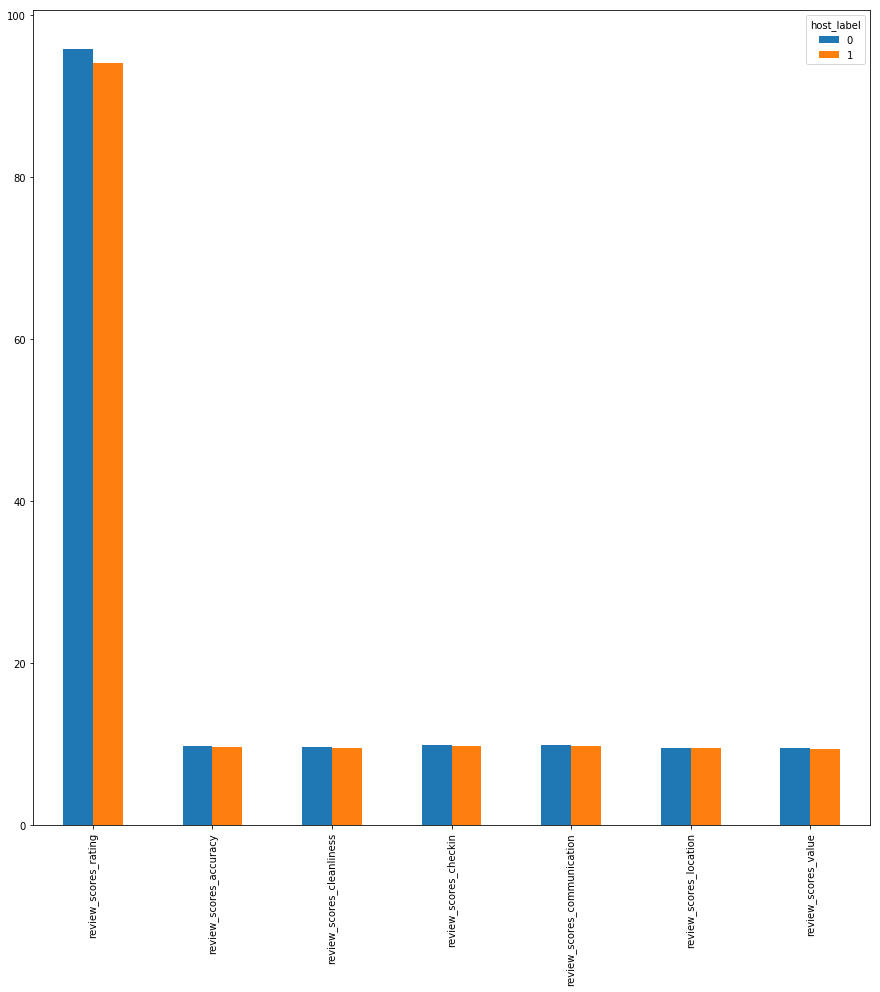

In [62]:
ax = airbnb5.plot.bar()

The graph above gives us the same perception about the data points. From a graphic perspective it does not look like there is any significant difference between professionals and amateurs when it comes to score review. This could tell us that a lister does not improve their hosting abilities over time. However, this is only based on 2015 data points and cannot be taken as a solid analysis. In addition, the amateurs score the highest on all the different categories. The hypothesis was that the professionals got a higher score. Further classification needs therefore to be approach opposite of what was intended. 

Below, we can have a look at how one of the data points, review_scores_rating, is distributed.

In [63]:
pro_review = []
am_review = []
for i in range(len(airbnb4)):
    if airbnb4.iloc[i,8] == 1:
        pro_review.append(airbnb4.iloc[i,0])
    else:
        am_review.append(airbnb4.iloc[i,0])


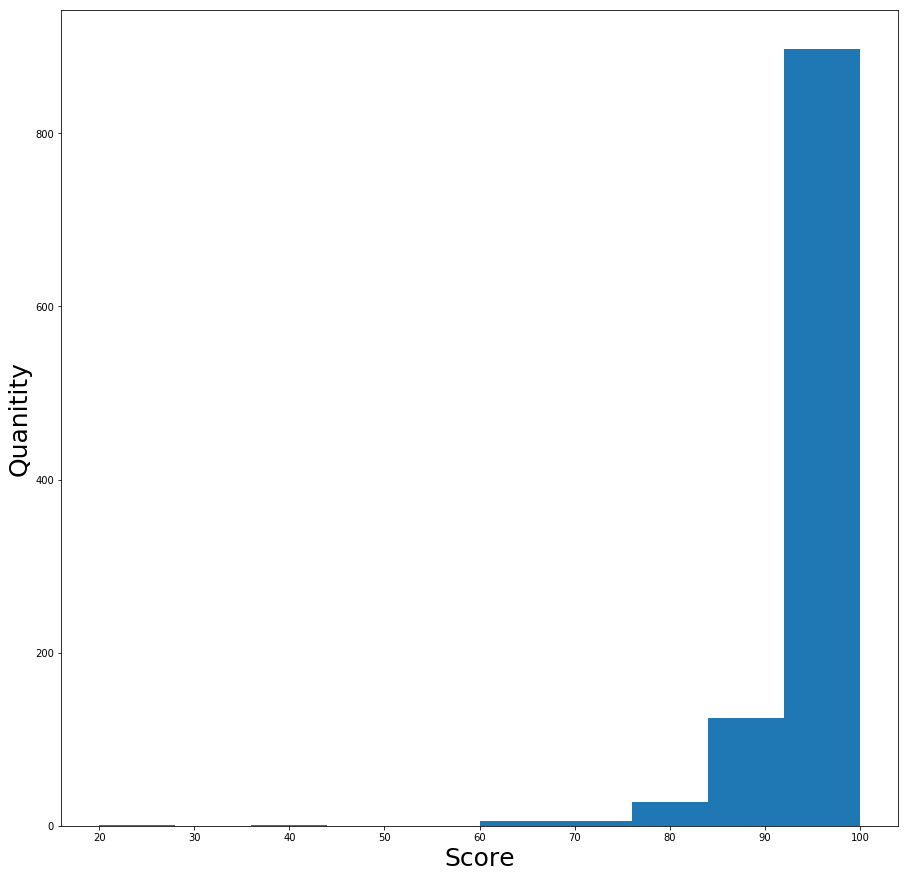

In [64]:
plt.hist(am_review)
plt.xlabel('Score', fontsize=25)
plt.ylabel('Quanitity', fontsize=25)
plt.show()

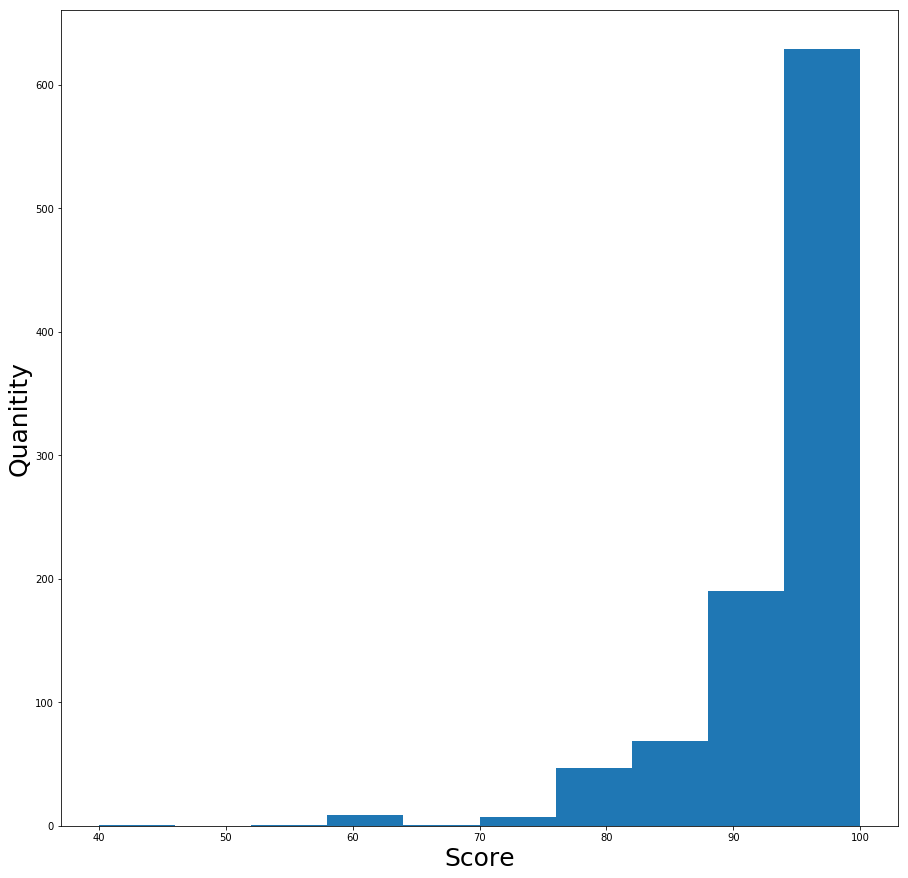

In [65]:
plt.hist(pro_review)
plt.xlabel('Score', fontsize=25)
plt.ylabel('Quanitity', fontsize=25)
plt.show()

The two graphs above shows that the data is very skewed towards the high end of the score rating. The output bellow tells us that there is a significant amount that gives a review of 90 and above.

In [66]:
pro_over_90 = [i for i in pro_review if i >= 90]
print("Professials with review score rating of 90 and above:", len(pro_over_90)/len(pro_review))

am_over_90 = [i for i in am_review if i >= 90]
print("Ammatures with review score rating of 90 and above:",len(pro_over_90)/len(am_review))

Professials with review score rating of 90 and above: 0.8197064989517819
Ammatures with review score rating of 90 and above: 0.7370405278039586


## Step 2: Classifying the Landlords

[[ go back to the top ]](#Table-of-contents)

Below will the dataset be split into a training set and test set.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

lr = LogisticRegression() 
rfc = RandomForestClassifier( n_estimators = 100)
svc = LinearSVC(C=1.0)

train, test = train_test_split(airbnb4, test_size = 0.2)
train_feat = train.iloc[:,0:7]
train_target = train['host_label']
test_feat = test.iloc[:,0:7]
test_target = test['host_label']

The first appoarch will be to use logistic regression.

In [68]:
lr.fit(train_feat, train_target)
print(lr.score(train_feat, train_target))
print(lr.score(test_feat, test_target))

0.5825062034739454
0.56575682382134


As suspected, the classification does not perform well. In binary classification, a classification that labels everything as one or the other will on average get 50% right. A score of 55% and 60% is not good.

A confusion matric will give us insight on how the classification is performing.

In [69]:
from sklearn.metrics import confusion_matrix
print('- Training -')
print(confusion_matrix(lr.predict(train_feat), train_target))
print('-   Test   -')
print(confusion_matrix(lr.predict(test_feat), test_target))

- Training -
[[717 527]
 [146 222]]
-   Test   -
[[164 141]
 [ 34  64]]


The tables above show us that there are a lot of True negative, but also a lot of False positive. 

Another approach is to use a Support Vector Machine. A support vector machine is a binary classifier and we can use it for multilabel classifications by using classification type called One-Vs-One or One-Vs-All. One-versus-One will be used.


In [70]:
from sklearn.multiclass import OneVsOneClassifier

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

xx = train_feat.values
yy = train_target.values

classifier = OneVsRestClassifier(LinearSVC(random_state=42))
classifier.fit(xx, yy)
print('Accuracy', classifier.score(xx, yy))

Accuracy 0.4646401985111663


The classification does not perform well. We can test the model by comparing how well it would do on another multi label classification dataset. The dataset I will use for comparison is the Iris dataset. 

In [71]:
from sklearn import datasets
iris = datasets.load_iris()
xxx, yyy = iris.data, iris.target

classifier = OneVsRestClassifier(LinearSVC(random_state=42))
classifier.fit(xxx, yyy)
print('Accuracy Iris Dataset', classifier.score(xxx, yyy))

Accuracy Iris Dataset 0.9666666666666667


As show above, the classification works perfectly on the Iris dataset.

Going further, Random Forest can be used 

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, max_leaf_nodes= 500, n_jobs=-1, n_estimators=500)

rfc.fit(train_feat, train_target)
rfc.score(train_feat, train_target)

0.7214640198511166

The score above looks promising compared to the previous classification algorithm. In order to test the accuracy, it should perform well on the test set as well.

In [73]:
rfc.score(test_feat, test_target)

0.5260545905707196

It does not perform well on the test set. The last approach will be to use Tensorflow. 

## Step 3: TensorFlow

[[ go back to the top ]](#Table-of-contents)

A tensor is multidimensional arrays that flows between operations, hence the name, TensorFlow. We will start by creating a function and the classifier. 

In [76]:
import tensorflow as tf
warnings.filterwarnings('ignore')

columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                'review_scores_value']

feature_columns = [tf.contrib.layers.real_valued_column(k) for k in columns]

def input_fn(df,labels):
    feature_cols = {k:tf.constant(df[k].values,shape = [df[k].size,1]) for k in columns}
    label = tf.constant(labels.values, shape = [labels.size,1])
    return feature_cols,label

classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20],n_classes = 2)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff5a87ab128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp0m32fkli'}


We will be using 10000 steps to fit the model

In [77]:
classifier.fit(input_fn=lambda: input_fn(train_feat, train_target),steps = 10000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0m32fkli/model.ckpt.
INFO:tensorflow:loss = 11.757007, step = 1
INFO:tensorflow:global_step/sec: 431.255
INFO:tensorflow:loss = 0.6836758, step = 101 (0.234 sec)
INFO:tensorflow:global_step/sec: 560.627
INFO:tensorflow:loss = 0.68665445, step = 201 (0.178 sec)
INFO:tensorflow:global_step/sec: 553.804
INFO:tensorflow:loss = 0.68181795, step = 301 (0.180 sec)
INFO:tensorflow:global_step/sec: 523.014
INFO:tensorfl

INFO:tensorflow:loss = 0.6669393, step = 6401 (0.152 sec)
INFO:tensorflow:global_step/sec: 646.669
INFO:tensorflow:loss = 0.66689634, step = 6501 (0.154 sec)
INFO:tensorflow:global_step/sec: 653.878
INFO:tensorflow:loss = 0.66685313, step = 6601 (0.153 sec)
INFO:tensorflow:global_step/sec: 645.715
INFO:tensorflow:loss = 0.66920006, step = 6701 (0.155 sec)
INFO:tensorflow:global_step/sec: 654.946
INFO:tensorflow:loss = 0.6667929, step = 6801 (0.153 sec)
INFO:tensorflow:global_step/sec: 655.218
INFO:tensorflow:loss = 0.66675425, step = 6901 (0.153 sec)
INFO:tensorflow:global_step/sec: 640.936
INFO:tensorflow:loss = 0.66669226, step = 7001 (0.156 sec)
INFO:tensorflow:global_step/sec: 660.789
INFO:tensorflow:loss = 0.66666186, step = 7101 (0.151 sec)
INFO:tensorflow:global_step/sec: 663.235
INFO:tensorflow:loss = 0.6667017, step = 7201 (0.151 sec)
INFO:tensorflow:global_step/sec: 647.18
INFO:tensorflow:loss = 0.6667405, step = 7301 (0.154 sec)
INFO:tensorflow:global_step/sec: 646.481
INFO:

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7ff5a880cf60>, 'hidden_units': [10, 20], 'feature_columns': (_RealValuedColumn(column_name='review_scores_rating', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='review_scores_accuracy', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='review_scores_cleanliness', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='review_scores_checkin', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='review_scores_communication', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='review_scores_location', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='review_scores_value', dimension=1, d

In [78]:
ev = classifier.evaluate(input_fn=lambda: input_fn(test_feat,test_target),steps=1)
print(ev)

INFO:tensorflow:Starting evaluation at 2019-03-31T14:41:18Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp0m32fkli/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-03-31-14:41:18
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.5508685, accuracy/baseline_label_mean = 0.5086849, accuracy/threshold_0.500000_mean = 0.5508685, auc = 0.57580686, auc_precision_recall = 0.5992081, global_step = 10000, labels/actual_label_mean = 0.5086849, labels/prediction_mean = 0.46572906, loss = 0.69028205, precision/positive_threshold_0.500000_mean = 0.61538464, recall/positive_threshold_0.500000_mean = 0.31219512
{'loss': 0.69028205, 'accuracy': 0.5508685, 'labels/prediction_mean': 0.46572906, 'labels/actual_label_mean': 0.5086849, 'accur

Bellow we can see that the accuracy of the model is 59 % which is not satisfying. As stated earlier, everthing below 70% is not worth going further with.

In [79]:
print('Accuracy',ev['accuracy'])

Accuracy 0.5508685


In [80]:
def input_predict(df):
    feature_cols = {k:tf.constant(df[k].values,shape = [df[k].size,1]) for k in columns}
    return feature_cols

pred = classifier.predict_classes(input_fn=lambda: input_predict(test_feat))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0m32fkli/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [81]:
print(list(pred))

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 

By comparing the predicted above and the original above we can visualize how the model predicted the labels

In [82]:
print(test_target.values)


[0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0]


By copying the generated output from the predicted value, and storing it in the variable "p",  we can build a model that show us how the TensorFlow calculate its accuracy. The value is copied and pasted, because the "pred" is a generator which does not store its value in memory, they generate the value on the fly. 

In [83]:
p = [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
     1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 
     0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 
     1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 
     0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 
     1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 
     1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 
     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 
     1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 
     0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 
     1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 
     1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 
     0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 
     0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
     1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 
     0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [84]:
tt = test_target.values

correct = 0
false = 0
counter = 0
for i in p:
    if i == tt[counter]:
        correct = correct + 1
    else:
        false = false + 1    
    counter = counter +1
    
print(correct/(false+correct))
                               
round(correct/(false+correct), 5) == round(float(ev['accuracy']),5)                               

0.5508684863523573


True

The output above shows us the accuracy and that the accuracy matches the accuracy TensorFlow gives us.

## Conclusion

[[ go back to the top ]](#Table-of-contents)


Classification of the different regions in Bristol based on longitude and latitude is something that could easily be done with machine learning. The more data points that is introduced, the more accuracy you will probably get. Geocoding are used by companies to predict where customers are. 

The dataset was not capable to distinguish between professional and amateur listers. This was clearly stated before the introduction of the classifications and was based on the fact that armatures scored better than the professionals. in addition, the differences were not significant. A bigger dataset would probably have given a different output. However, amateurs might score better because they feel the pressure to please the customer. That being said, this can only be seen as speculations.

Due to the fact that these findings where so obvious, K-fold cross validation was not introduced since it would not have given a significant different output. To test whether or not the voting classifier is better than the K-neighbours to predict the neighbourhoods more data is needed since the differences where so small. This report was made to show how you can modify and compare algorithms. 



## References

[[ go back to the top ]](#Table-of-contents)


Géron, A.,(2017). Hands-on machine learning with scikit-learn and tensorflow.

Wolpert, D.H., Macready, W.G. (1997) No Free Lunch Theorme for optimization. 

Britol Goverment (2019): https://www.bristol.gov.uk/documents/20182/34008/2011%20Census%20-%20Population%20and%20household%20estimates%20for%20small%20areas.pdf/14c400f5-2274-4478-8a07-50a17fa06926